In [1]:
%matplotlib inline

import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import hw1_p1_script as hw1

""" 
This part constructs training, validation and testing inputs for MNIST dataset (Part A)

"""

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Reserve the last 5000 training examples for validation
    X_train, X_val = X_train[:-5000], X_train[-5000:]
    y_train, y_val = y_train[:-5000], y_train[-5000:]
    
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

Using TensorFlow backend.


In [2]:
""" 
forward function outputs the logits when given the input X (Part A)

"""

def forward(network, X):
    
    activations = []
    input = X
    # Looping through each layer
    for l in network:
        activations.append(l.forward(input))
        # final input is last layer output
        input = activations[-1]
        
    return activations

def predict(network,X):
   
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y,t):
    
    """ 
    Train function first propagates the input forward in network and then computes loss (Part B)

    """
    
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations
    logits = layer_activations[-1]
    
    loss = hw1.softmax_crossentropy(logits,y)
    
    """ 
    grad_softmax_crossentropy computes the gradient for the cost (Part C)

    """
    loss_grad = hw1.grad_softmax_crossentropy(logits,y)
    
    """ 
    Back-propagation is the for loop that executes Dense.backward() function from last layer to the first layer (Part D)

    """
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad,t) 
        
    return np.mean(loss)

In [3]:
from tqdm import trange

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            sect = indices[start_idx:start_idx + batchsize]
        else:
            sect = slice(start_idx, start_idx + batchsize)
        yield inputs[sect], targets[sect]

100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2676.84it/s]


Epoch 0
Train accuracy: 0.9110545454545455
Val accuracy: 0.9318
Loss: 0.29903845883357194


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2674.13it/s]


Epoch 1
Train accuracy: 0.9281272727272727
Val accuracy: 0.9488
Loss: 0.03376551299362318


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2674.14it/s]


Epoch 2
Train accuracy: 0.9387454545454545
Val accuracy: 0.9558
Loss: 0.34885720925650693


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2662.12it/s]


Epoch 3
Train accuracy: 0.9458727272727273
Val accuracy: 0.9584
Loss: 0.2626277974565213


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2612.20it/s]


Epoch 4
Train accuracy: 0.9508909090909091
Val accuracy: 0.9634
Loss: 0.6346767043716897


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2705.99it/s]


Epoch 5
Train accuracy: 0.9560363636363637
Val accuracy: 0.9664
Loss: 0.28070278618520605


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2660.62it/s]


Epoch 6
Train accuracy: 0.9607818181818182
Val accuracy: 0.9694
Loss: 0.06137442117313746


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2613.73it/s]


Epoch 7
Train accuracy: 0.9641454545454545
Val accuracy: 0.9718
Loss: 0.049029389127543455


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2686.76it/s]


Epoch 8
Train accuracy: 0.9666181818181818
Val accuracy: 0.9732
Loss: 0.014997497468923537


100%|████████████████████████████████████████████████████████████████████████████| 3437/3437 [00:01<00:00, 2622.87it/s]


Epoch 9
Train accuracy: 0.9692909090909091
Val accuracy: 0.9738
Loss: 0.026683255089141322
Took 14.246474 s


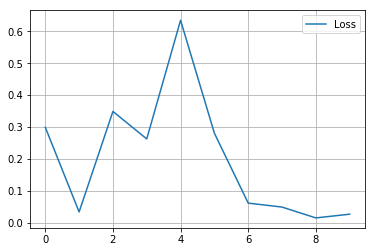

Test accuracy: 96.39 %


In [4]:
# Mini-batch size = 16

""" 
For each mini batch scenario, the layers are defined by appending the Dense class into network list (Part A)
For each epoch, the cost is plotted (Part E)

"""
network = []
network.append(hw1.Dense(X_train.shape[1],100))
network.append(hw1.ReLU())
network.append(hw1.Dense(100,10))

train_log = []
val_log = []
loss_log = []

t = 0

start = time.time()

for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=16,shuffle=True):
        
        t += 1
        
        loss = train(network,x_batch,y_batch,t)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    loss_log.append(loss)
    
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    print("Loss:",loss_log[-1])
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    
test_accuracy = np.mean(predict(network,X_test)==y_test) * 100
print("Test accuracy:",test_accuracy, "%")

100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1697.63it/s]


Epoch 0
Train accuracy: 0.8713636363636363
Val accuracy: 0.9066
Loss: 0.4674529939630049


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1657.07it/s]


Epoch 1
Train accuracy: 0.8914363636363636
Val accuracy: 0.9204
Loss: 0.32013266267708895


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1753.09it/s]


Epoch 2
Train accuracy: 0.9014909090909091
Val accuracy: 0.9254
Loss: 0.34014870859954216


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1654.97it/s]


Epoch 3
Train accuracy: 0.9096909090909091
Val accuracy: 0.9324
Loss: 0.3700245698929488


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1721.44it/s]


Epoch 4
Train accuracy: 0.9148
Val accuracy: 0.937
Loss: 0.30026883407834276


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1618.98it/s]


Epoch 5
Train accuracy: 0.9200727272727273
Val accuracy: 0.9392
Loss: 0.3231776315337713


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1666.56it/s]


Epoch 6
Train accuracy: 0.9244181818181818
Val accuracy: 0.942
Loss: 0.1624216056398324


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1621.36it/s]


Epoch 7
Train accuracy: 0.9271636363636364
Val accuracy: 0.9446
Loss: 0.323672614641484


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1745.41it/s]


Epoch 8
Train accuracy: 0.9307090909090909
Val accuracy: 0.9454
Loss: 0.3603579013033008


100%|██████████████████████████████████████████████████████████████████████████████| 859/859 [00:00<00:00, 1700.86it/s]


Epoch 9
Train accuracy: 0.9335272727272728
Val accuracy: 0.9486
Loss: 0.13994940019825783
Took 6.435628 s


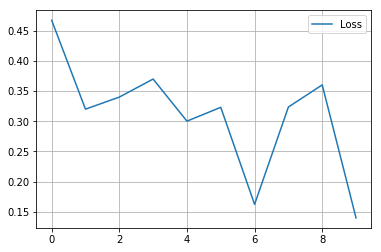

Test accuracy: 93.69 %


In [5]:
# Mini-batch size = 64

network = []
network.append(hw1.Dense(X_train.shape[1],100))
network.append(hw1.ReLU())
network.append(hw1.Dense(100,10))

train_log = []
val_log = []
loss_log = []

t = 0

start = time.time()

for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=64,shuffle=True):
        
        t += 1
        
        loss = train(network,x_batch,y_batch,t)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    loss_log.append(loss)
    
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    print("Loss:",loss_log[-1])
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    
test_accuracy = np.mean(predict(network,X_test)==y_test) * 100
print("Test accuracy:",test_accuracy, "%")

100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 403.80it/s]


Epoch 0
Train accuracy: 0.7763818181818182
Val accuracy: 0.8134
Loss: 1.0618123149794614


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 400.95it/s]


Epoch 1
Train accuracy: 0.8404
Val accuracy: 0.882
Loss: 0.6766078241687201


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 397.74it/s]


Epoch 2
Train accuracy: 0.8636727272727273
Val accuracy: 0.9004
Loss: 0.5615769962518296


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 402.46it/s]


Epoch 3
Train accuracy: 0.8756
Val accuracy: 0.9102
Loss: 0.4269073577676357


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 396.40it/s]


Epoch 4
Train accuracy: 0.8826181818181819
Val accuracy: 0.9154
Loss: 0.3938216647305174


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 394.64it/s]


Epoch 5
Train accuracy: 0.8885454545454545
Val accuracy: 0.9204
Loss: 0.39471012586538434


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 404.97it/s]


Epoch 6
Train accuracy: 0.8929818181818182
Val accuracy: 0.9226
Loss: 0.39686934575798305


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 412.33it/s]


Epoch 7
Train accuracy: 0.8955090909090909
Val accuracy: 0.9232
Loss: 0.41645857009847664


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 415.41it/s]


Epoch 8
Train accuracy: 0.899309090909091
Val accuracy: 0.9252
Loss: 0.37631217679506856


100%|███████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 408.04it/s]


Epoch 9
Train accuracy: 0.9016363636363637
Val accuracy: 0.927
Loss: 0.3122521662765602
Took 6.628797 s


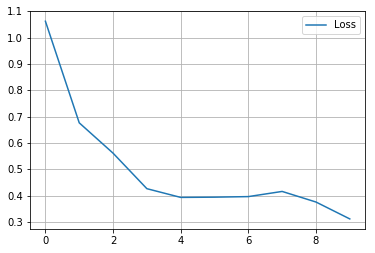

Test accuracy: 90.75 %


In [6]:
# Mini-batch size = 256

network = []
network.append(hw1.Dense(X_train.shape[1],100))
network.append(hw1.ReLU())
network.append(hw1.Dense(100,10))

train_log = []
val_log = []
loss_log = []

t = 0

start = time.time()

for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=256,shuffle=True):
        
        t += 1
        
        loss = train(network,x_batch,y_batch,t)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    loss_log.append(loss)
    
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    print("Loss:",loss_log[-1])
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    
test_accuracy = np.mean(predict(network,X_test)==y_test) * 100
print("Test accuracy:",test_accuracy, "%")

100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 105.60it/s]


Epoch 0
Train accuracy: 0.46698181818181816
Val accuracy: 0.5026
Loss: 1.9673781686329164


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 104.88it/s]


Epoch 1
Train accuracy: 0.6434727272727273
Val accuracy: 0.6744
Loss: 1.5925246739883319


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 102.72it/s]


Epoch 2
Train accuracy: 0.7213272727272727
Val accuracy: 0.7594
Loss: 1.2844292359724796


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 111.14it/s]


Epoch 3
Train accuracy: 0.7662909090909091
Val accuracy: 0.8096
Loss: 1.1022808332006453


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 108.97it/s]


Epoch 4
Train accuracy: 0.7947272727272727
Val accuracy: 0.8412
Loss: 0.951162969526189


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 107.16it/s]


Epoch 5
Train accuracy: 0.8127090909090909
Val accuracy: 0.856
Loss: 0.8558591695363671


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 108.59it/s]


Epoch 6
Train accuracy: 0.8258181818181818
Val accuracy: 0.8676
Loss: 0.7451084795167839


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 109.18it/s]


Epoch 7
Train accuracy: 0.8367818181818182
Val accuracy: 0.875
Loss: 0.7318164642163276


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 114.20it/s]


Epoch 8
Train accuracy: 0.843
Val accuracy: 0.881
Loss: 0.6628082529817834


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 109.59it/s]


Epoch 9
Train accuracy: 0.8492545454545455
Val accuracy: 0.8866
Loss: 0.5889409117663619
Took 6.225822 s


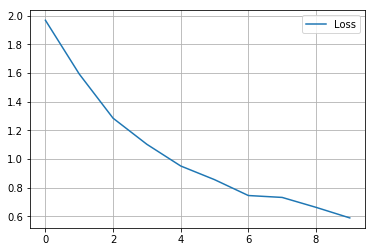

Test accuracy: 86.19 %


In [7]:
# Mini-batch size = 1024

network = []
network.append(hw1.Dense(X_train.shape[1],100))
network.append(hw1.ReLU())
network.append(hw1.Dense(100,10))

train_log = []
val_log = []
loss_log = []

t = 0

start = time.time()

for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=1024,shuffle=True):
        
        t += 1
        
        loss = train(network,x_batch,y_batch,t)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    loss_log.append(loss)
    
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    print("Loss:",loss_log[-1])
    
end = time.time()
print("Took %f s" % ((end - start)))

plt.plot(loss_log,label='Loss')
#plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()    
test_accuracy = np.mean(predict(network,X_test)==y_test) * 100
print("Test accuracy:",test_accuracy, "%")